In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
from tqdm import tqdm
from max_cut_gw import solve_sdp_program, find_cut
from utils import load_gset_graph

In [2]:
W = load_gset_graph('./benchmark/max_k_cut/G14')

In [3]:
RELAX = solve_sdp_program(W)

In [4]:
A = cholesky(RELAX)

In [5]:
np.random.seed(1)
eps   = 0.001
alpha = 0.87856
c = (eps * alpha) / (2 + 2 * eps - alpha)
print(f'for eps={eps}, run step 2 and 3 for {int(1/c + 1)} times')

for eps=0.001, run step 2 and 3 for 1279 times


In [6]:
sums = list()
for _ in tqdm(range(int(1/c + 1))):
    s = find_cut(A, W)
    sums.append(s)

100%|██████████| 1279/1279 [02:13<00:00,  9.56it/s]


In [7]:
max(sums)

2981.0

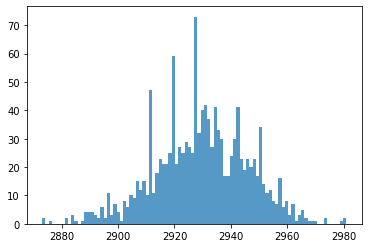

In [10]:
plt.hist(sums, len(list(set(sums))), alpha=0.75)
plt.show()